### O objetivo desse notebook é implementar uma regressão linear na mão


Para isso vamos usar os seguintes dados, onde o nosso objetivo é prever o tempo da sentença dado o numero de condenações anteriores


In [62]:
from matplotlib import pyplot as plt
import plotly.express as px
from matplotlib import cm
import pandas as pd
import numpy as np

# Gerando um dataframe com os dados
condenacoes = np.array([0, 3, 1, 0, 6, 5, 3, 4, 10, 8])
sentencas = np.array([12, 13, 15, 19, 26, 27, 29, 31, 40, 48])

df = pd.DataFrame({"condenações": condenacoes, "sentenças": sentencas})
display(df.head())

# Criando um gráfico para visualizar os dados
fig = px.scatter(df, x="condenações", y="sentenças")
fig.show()

,condenações,sentenças
0,0,12
1,3,13
2,1,15
3,0,19
4,6,26


### Preparando os dados para a regressão
Uma regressão linear pode ser descrita pela seguinte equação:

$$\hat{Y} = \beta_{0} + \beta_{1}X$$

Onde o $X$ é o número de condenações anteriores e o $Y$ é o tempo da sentença. E o nosso objetivo é encontrar os valores de $\beta_{0}$ e $\beta_{1}$ para que a equação acima seja satisfeita.

Vamos implementar uma função que recebe o valor de x os betas $\beta_{0}$ e $\beta_{1}$ e retorna o valor de $\hat{Y}$.


In [2]:
def regressao_linear(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

Legal, mas como podemos fazer para econtar os betas agora?
Básicamente vamos chutar vários valores de $\beta_{0}$ e $\beta_{1}$ e ver qual o melhor valor. Mas para saber se o valor chutado é o melhor que o anterior, precisamos definir alguma métrica quantitativa que nos indique isso.

Para isso nós vamos usar o erro quadrático médio, que pode ser calculada da seguinte forma:

$$EQM = \frac{1}{m} \sum_{i=1}^{m}(y_{i} - \hat{y}_{i})^2$$

Agora vamos implementar uma função que calcule o erro quadrático

In [16]:
def erro_quadratico(y, y_hat):
    return (y - y_hat) ** 2

Agora que temos uma função que gera uma regressão linear e uma que calcula o erro do nosso modelo, podemos integrar essas duas para avaliar cada beta testado.

In [29]:
def avaliar_beta(x, y, beta_0, beta_1):
    soma_dos_erros = 0
    for i in range(len(x)):
        y_hat = regressao_linear(x[i], beta_0, beta_1)
        soma_dos_erros += erro_quadratico(y[i], y_hat)
    return soma_dos_erros / len(x)

In [30]:
beta_0, beta_1 = 1, 1
tentativa_1 = avaliar_beta(condenacoes, sentencas, beta_0, beta_1)

beta_0, beta_1 = 13, 5
tentativa_2 = avaliar_beta(condenacoes, sentencas, beta_0, beta_1)

print(f'{tentativa_1 = }\n{tentativa_2 = }')

tentativa_1 = 516.0
tentativa_2 = 124.0


Conseguimos calcular o erro do nosso modelo! Mas como sabemos se esse erro é o menor possível? Testar todos os valóres possiveis para $\beta_{0}$ e $\beta_{1}$ e ver qual é o menor valor?
Não parece uma tarefa fácil, mas vamos tentar!

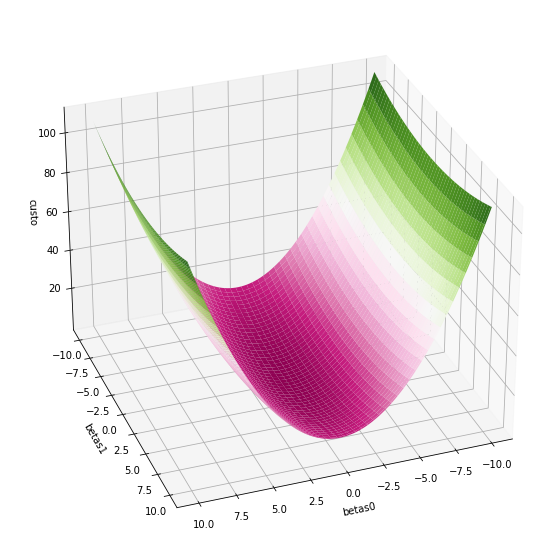

In [86]:
# Padronizando os dados pq não somos vândalos
condenacoes_padronizados = (condenacoes - condenacoes.mean()) / condenacoes.std() ** 2
sentencas_padronizadas = (sentencas - sentencas.mean()) / sentencas.std() ** 2


tamanho_da_matriz = 100

range_betas = [-10, 10]
mat_betas0 = np.outer(np.linspace(*range_betas, tamanho_da_matriz), np.ones(tamanho_da_matriz))
mat_betas1 = np.outer(np.ones(tamanho_da_matriz), np.linspace(*range_betas, tamanho_da_matriz))

superfice_de_custo = avaliar_beta(condenacoes_padronizados, sentencas_padronizadas, mat_betas0, mat_betas1)

ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
ax.view_init(30, 70)
ax.plot_surface(mat_betas0, mat_betas1, superfice_de_custo, cmap=cm.PiYG)
ax.set_xlabel('betas0')
ax.set_ylabel('betas1')
ax.set_zlabel('custo');

A solução otima estaria no mínimo global